# 计算机系单独分析 

## 1.导入数据

In [1]:
import jiebaCut as jc
sourcePath = r'D:\GitHub\Course\computerData\course'
dicPath = r'D:\GitHub\Course\user\my中文和符号1960.txt'
storePath = r'D:\GitHub\Course\computerData\cut\cutResult.csv'
jc.cut(sourcePath, dicPath, 'single', storePath, 'one', 'csv')

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\king\AppData\Local\Temp\jieba.cache
Loading model cost 2.519 seconds.
Prefix dict has been built succesfully.


In [2]:
import csv
sourcePath = r'D:\GitHub\Course\computerData\cut\cutResult.csv'
storePath = r'D:\GitHub\Course\computerData\cut\allCutResult.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
allResult = set()   # 利用set实现不重复记录
for line in file:
    flag = True     # 实现文件名称不记录功能
    for word in line:
        if flag:
            flag = False
        else:
            if word != '':
                allResult.add(word)     # 字符不为空是进行记录
            else:
                continue
fileStore = open(storePath, 'w', newline='', encoding='utf-8')
csv.writer(fileStore).writerow(allResult)
fileStore.close()

In [3]:
import csv
sourcePath = r'D:\GitHub\Course\computerData\cut\allCutResult.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
dict = {}
for line in file:
    for word in line:
        dict[word] = 0
sourcePath = r'D:\GitHub\Course\computerData\cut\cutResult.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
courseNum = 0
for line in file:
    courseNum = courseNum + 1
    for word in line:
        if word in dict:
            dict[word] = dict[word] + 1
        else:
            continue
storePath = r'D:\GitHub\Course\computerData\cut\allCutResultIdf.csv'
idfList = []
out = open(storePath, 'a', newline='', encoding='utf-8')
csv_write = csv.writer(out, dialect='excel')
for k in sorted(dict, key=dict.__getitem__, reverse=True):
    temp = [k, dict[k] / courseNum]
    csv_write.writerow(temp)
    if dict[k]/courseNum < 0.618:
        idfList.append(k)
    else:
        continue
storePath = r'D:\GitHub\Course\computerData\cut\wordsIdf.csv'
out = open(storePath, 'a', newline='', encoding='utf-8')
csv_write = csv.writer(out, dialect='excel')
csv_write.writerow(idfList)

99106

In [9]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
from gensim.models import KeyedVectors
# 导入语料库
corpusPath = r"D:\GitHub\Course\user\my-small.txt"
# corpusPath = CURRENT_PATH + r"/user/500000-small.txt"
wv = KeyedVectors.load_word2vec_format(corpusPath, binary=False)

In [10]:
# 判断词是否在语料库中并寻找向量
dfIndex = []     # 可以使用的词
vectorWords = []        # 可用词的向量
# sourcePath = r'D:\GitHub\Course\data\cut\wordsIdf.csv'
sourcePath = r'D:\GitHub\Course\computerData\cut\wordsIdf.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
allWord = []
for line in file:
    for word in line:
        allWord.append(word)
for word in allWord:
    try:
        vector = wv[word]
        dfIndex.append(word)
        vectorWords.append(vector)
    except:
        continue
# 将可用的词按列存储
# storeWords = r'D:\GitHub\Course\data\tencent\dfIndex.csv'
storeWords = r'D:\GitHub\Course\computerData\tencent\dfIndex.csv'
f_csv = open(storeWords, 'w', newline='', encoding='utf-8')
csv.writer(f_csv).writerow(dfIndex)
f_csv.close()
# 将可用的向量按列存储
# storeVectors = r'D:\GitHub\Course\data\tencent\vectorsUseful.csv'
storeVectors = r'D:\GitHub\Course\computerData\tencent\vectorsUseful.csv'
f_csv = open(storeVectors, 'a', newline='', encoding='utf-8')
f = csv.writer(f_csv, dialect='excel')
for vector in vectorWords:
    f.writerow(vector)
f_csv.close()

In [11]:
import csv
import pandas as pd
sourcePath = r'D:\GitHub\Course\computerData\tencent\dfIndex.csv'
# sourcePath = CURRENT_PATH + r'/data/matrix/dfIndex.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
wordsUseful = []
for line in file:
    for word in line:
        wordsUseful.append(word)
sourcePath = r'D:\GitHub\Course\computerData\cut\cutResult.csv'
storePath = r'D:\GitHub\Course\computerData\tencent\cutResultUseful.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
allCutResultUseful = []
for line in file:
    flag = False
    temp = []
    for word in line:
        if flag:
            if word is not '':
                if word in wordsUseful:
                    temp.append(word)
                else:
                    continue
            else:
                continue
        else:
            temp.append(word)
            flag = True
            # print(word)
    allCutResultUseful.append(temp)
dfWords = pd.DataFrame(data=allCutResultUseful)
dfWords.to_csv(storePath, index=False, header=False, encoding='utf-8')

In [12]:
import csv
# 归一化向量数据，使得余弦距离和欧氏距离近似相等
import numpy as np
import pandas as pd
dataVectors = r'D:\GitHub\Course\computerData\tencent\vectorsUseful.csv'
vectorDF = pd.read_csv(dataVectors, header=None, index_col=False)
from sklearn import preprocessing
vectorsArray = vectorDF.values
vectorNorm = preprocessing.normalize(vectorsArray, norm='l2')
vectorNDF = pd.DataFrame(data=vectorNorm)
storePath = r'D:\GitHub\Course\computerData\tencent\vectorsNorm.csv'
vectorNDF.to_csv(storePath, index=False, header=False)

## 2.使用KMedoids聚类 

In [13]:
from pyclust import KMedoids
import csv
import pandas as pd
# 导入所有单词
sourcePath = r'D:\GitHub\Course\computerData\tencent\dfIndex.csv'
wordsAllDF = pd.read_csv(sourcePath, header=None, index_col=False, encoding='utf-8')
wordsAllLst = []
for i in wordsAllDF.columns:
    wordsAllLst.append(wordsAllDF.iloc[0, i])
# 导入单词向量
sourcePath = r'D:\GitHub\Course\computerData\tencent\vectorsNorm.csv'
vectorsDF = pd.read_csv(sourcePath, header=None, index_col=False, encoding='utf-8')
vectorsDF.index = wordsAllLst

In [14]:
KMD = KMedoids(n_clusters=150, n_trials=50, distance='euclidean', max_iter=500)
KMD.fit(vectorsDF.values)

In [15]:
# 类别将结果保存
labelsDF = pd.DataFrame(data=KMD.labels_, index=wordsAllLst)
storePath = r'D:\GitHub\Course\computerData\KMedoids\labels150.csv'
labelsDF.to_csv(storePath, encoding='utf-8', index=True, header=False)
# 将类别中心单词和向量同时储存
centersDF = pd.DataFrame(data=KMD.centers_)
centersWordsLst = []
for i in centersDF.index:
    print(i)
    for word in wordsAllLst:
        if (centersDF.iloc[i, :] == vectorsDF.loc[word, :]).all():
            centersWordsLst.append(word)
            print(word)
            break
centersDF.index = centersWordsLst
storePath = r'D:\GitHub\Course\computerData\KMedoids\centers150.csv'
centersDF.to_csv(storePath, encoding='utf-8', index=True, header=False)
# 将类别中心对应的sse分别储存
sseDF = pd.DataFrame(data=KMD.sse_arr_, index=centersWordsLst)
storePath = r'D:\GitHub\Course\computerData\KMedoids\sse150.csv'
sseDF.to_csv(storePath, encoding='utf-8', index=True, header=False)
# 将聚类中心所对应的单词进行整理
wordsSort = []
for word in centersWordsLst:
    temp = []
    temp.append(word)
    wordsSort.append(temp)
for word in labelsDF.index:
    wordsSort[labelsDF.loc[word, 0]].append(word)
wordsSortDF = pd.DataFrame(data=wordsSort)
storePath = r'D:\GitHub\Course\computerData\KMedoids\centersWords150.csv'
wordsSortDF.to_csv(storePath, encoding='utf-8', index=False, header=False)

0
上册
1
核对
2
查资料
3
实务
4
应用服务
5
小鸡
6
考核成绩
7
销售收入
8
螺旋
9
除法
10
积极主动
11
班级
12
弄懂
13
读
14
导言
15
防水
16
进度表
17
字
18
签约
19
跨文化
20
想法
21
储备
22
异常情况
23
卡尔
24
高校
25
制品
26
电子货币
27
思想道德
28
行将
29
类似
30
两遍
31
商品
32
判别
33
勤学
34
组织协调
35
间接
36
考试成绩
37
application
38
信号
39
连通
40
区别
41
当今
42
新
43
强度
44
抽象
45
英语专业
46
快捷键
47
内在
48
学科知识
49
激
50
李
51
工程化
52
下界
53
丧失
54
层
55
同上
56
人机交互
57
方程
58
总线
59
素养
60
公共
61
身心
62
车
63
消解
64
课
65
体裁
66
十分钟
67
市场预测
68
停满
69
交流平台
70
现金流量
71
open
72
外观
73
地区
74
费用
75
上海
76
市场营销
77
梯形
78
政治体制
79
阶层
80
网络服务
81
驱动程序
82
协议
83
热传导
84
表中
85
自我认识
86
电压
87
两组
88
交流
89
电子器件
90
分量
91
可对
92
恰到好处
93
比赛
94
诸多
95
座谈会
96
观后感
97
精华
98
几种
99
前提
100
手机号码
101
直径
102
借鉴
103
幕后
104
中心点
105
选择
106
工程项目
107
十字
108
分队
109
第七十七
110
树
111
长度
112
有限
113
共产党
114
范围广
115
陌生
116
公里
117
投影
118
淡入
119
短语
120
摊销
121
xml
122
暗示
123
相互协作
124
隐藏
125
改善
126
法律意识
127
历史
128
一倍
129
for
130
短文
131
限
132
腐蚀
133
图层
134
由北向南
135
时间
136
战略目标
137
二者
138
五种
139
举办
140
数组
141
希望
142
单侧
143
得以
144
貌似
145
破译
146
深刻理解
147
片段

## 3.词云图 

(-0.5, 1023.5, 829.5, -0.5)

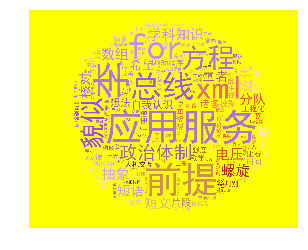

In [16]:
import pandas as pd
sourcePath=r'D:\GitHub\Course\computerData\KMedoids\sse150.csv'
wordsPD=pd.read_csv(sourcePath, encoding='utf-8', header=None, index_col=0)
wordDict={}
for word in wordsPD.index:
    wordDict[word] = float(wordsPD.loc[word,1]/wordsPD.values.sum())
%matplotlib inline
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from pylab import *
from PIL import Image
import numpy
# 显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.family'] = 'sans-serif'
# 解决负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False
sourcePath=r'D:\GitHub\Course\user\background.jpg'
# 背景图片
image = Image.open(sourcePath)
graph = numpy.array(image)
# 设置字体，背景颜色，字体最大值，背景图片
wc = WordCloud(font_path='simhei.ttf', background_color='Yellow', max_font_size=150, mask=graph)
wc.generate_from_frequencies(wordDict)
image_color = ImageColorGenerator(graph)
plt.imshow(wc)
plt.imshow(wc.recolor(color_func=image_color))
plt.axis('off')

(-0.5, 1023.5, 829.5, -0.5)

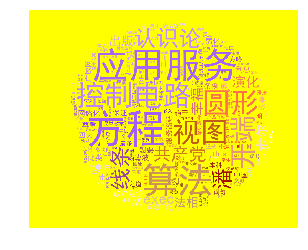

In [17]:
import pandas as pd
sourcePath=r'D:\GitHub\Course\computerData\KMedoids\sse200.csv'
wordsPD=pd.read_csv(sourcePath, encoding='utf-8', header=None, index_col=0)
wordDict={}
for word in wordsPD.index:
    wordDict[word] = float(wordsPD.loc[word,1]/wordsPD.values.sum())
%matplotlib inline
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from pylab import *
from PIL import Image
import numpy
# 显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.family'] = 'sans-serif'
# 解决负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False
sourcePath=r'D:\GitHub\Course\user\background.jpg'
# 背景图片
image = Image.open(sourcePath)
graph = numpy.array(image)
# 设置字体，背景颜色，字体最大值，背景图片
wc = WordCloud(font_path='simhei.ttf', background_color='Yellow', max_font_size=150, mask=graph)
wc.generate_from_frequencies(wordDict)
image_color = ImageColorGenerator(graph)
plt.imshow(wc)
plt.imshow(wc.recolor(color_func=image_color))
plt.axis('off')